In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('WC_AT.csv')
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [4]:
df.shape

(109, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [7]:
df[df.duplicated()].shape

(0, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x213a8eafca0>,
 'caps': [<matplotlib.lines.Line2D at 0x213a8eaf3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x213a8eaf700>],
 'medians': [<matplotlib.lines.Line2D at 0x213a8910b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x213a89105b0>],
 'means': []}

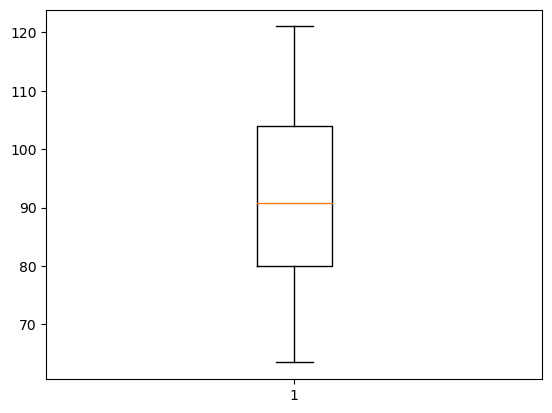

In [8]:
plt.boxplot(df['Waist'])

{'whiskers': [<matplotlib.lines.Line2D at 0x213a9c994f0>,
 'caps': [<matplotlib.lines.Line2D at 0x213a9c99a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x213a9c68070>],
 'medians': [<matplotlib.lines.Line2D at 0x213aa05a0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x213aa05a370>],
 'means': []}

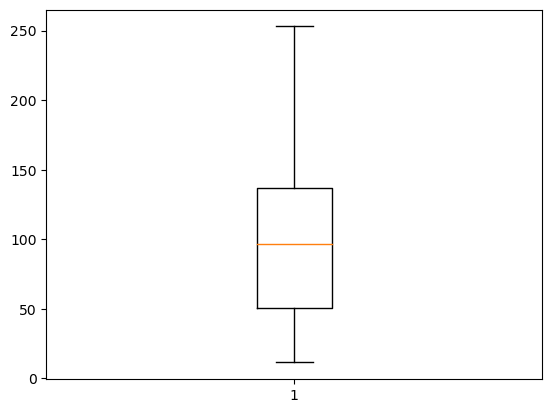

In [9]:
plt.boxplot(df['AT'])

In [10]:
import statsmodels.formula.api as sfa
model = sfa.ols('Waist~AT',data=df).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Waist   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.62e-27
Time:                        21:45:42   Log-Likelihood:                -377.90
No. Observations:                 109   AIC:                             759.8
Df Residuals:                     107   BIC:                             765.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.1633      1.535     47.025      0.000      69.121      75.205
AT             0.1937      0.013     14.740      0.000       0.168       0.220
==============================================================================
Omnibus:                       24.032   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.106
Skew:                           1.014   Prob(JB):                     8.76e-09
Kurtosis:                       5.015   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Equation is : y(Waist)=72.16+0.19(AT)

In [12]:
newdata=pd.Series([290,124.6,178.9])
newdata

0    290.0
1    124.6
2    178.9
dtype: float64

In [17]:
pre_data=pd.DataFrame(newdata,columns=['AT'])

In [18]:
model.predict(pre_data)

0    128.340996
1     96.300346
2    106.819133
dtype: float64

In [20]:
pre_data['New Waist']=model.predict(pre_data)

In [21]:
pre_data

,AT,New Waist
0,290.0,128.340996
1,124.6,96.300346
2,178.9,106.819133
